# Project 2: Clustering

In [70]:
# Import all needed library needed
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import text
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

## Part 1 

In [22]:
# Importing the two class data & 
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware', 'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42)

# list of category indices of the documents
# Since we want to do 2 classes instead of 8 categories
labels = dataset.target // 4 

# Transforming the documents into TF-IDF
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = TfidfVectorizer(min_df=3, stop_words=stop_words)
tfidf_dataset = vectorizer.fit_transform(dataset.data)

print ("n_samples: %d, n_features: %d" % tfidf_dataset.shape) # dimensions are (7882, 27768)


n_samples: 7882, n_features: 27768


## Part 2

In [14]:
# K-clustering 
# n_cluster = k = 2 since there are two classes we are looking at
km = KMeans(n_clusters=2, n_init = 30).fit(tfidf_dataset)


# labels are the actual cluster
# km.labels_ are the predicted cluster
print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))


Confusion Matrix is  [[3899    4]
 [2262 1717]]
Homogeneity: 0.253
Completeness: 0.335
V-measure: 0.288
Adjusted Rand-Index: 0.181
Adjusted Mutual info score: 0.253


## Part 3

### (a - i) Variance

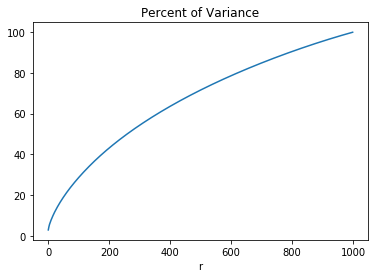

In [43]:
def calculate_svd_variance(tfidf):
    x_svd = TruncatedSVD(n_components = 1000) # n_components is desired dimensionality of output data
    x_svd.fit_transform(tfidf) # Transform the data
    singular_values_squared = np.square(x_svd.singular_values_) 
    sum_sv = 0
    var = []
    for i in singular_values_squared:
        sum_sv = sum_sv+i
        var.append(sum_sv)
    
    r = list(xrange(1000))
    plt.figure(1)
    plt.plot(np.cumsum(singular_values_squared)/np.sum(singular_values_squared)*100)
    plt.title('Percent of Variance')
    plt.xlabel('r')
    
calculate_svd_variance(tfidf_dataset)

### (a-ii) SVD

Calculating SVD for dimension, r =   1
Confusion Matrix is  [[1717 2186]
 [1674 2305]]
Calculating SVD for dimension, r =   2
Confusion Matrix is  [[3700  203]
 [ 440 3539]]
Calculating SVD for dimension, r =   3
Confusion Matrix is  [[3861   42]
 [1285 2694]]
Calculating SVD for dimension, r =   5
Confusion Matrix is  [[3898    5]
 [2441 1538]]
Calculating SVD for dimension, r =   10
Confusion Matrix is  [[3899    4]
 [2367 1612]]
Calculating SVD for dimension, r =   20
Confusion Matrix is  [[   3 3900]
 [1618 2361]]
Calculating SVD for dimension, r =   50
Confusion Matrix is  [[   3 3900]
 [1639 2340]]
Calculating SVD for dimension, r =   100
Confusion Matrix is  [[   3 3900]
 [1662 2317]]
Calculating SVD for dimension, r =   300
Confusion Matrix is  [[   4 3899]
 [1684 2295]]


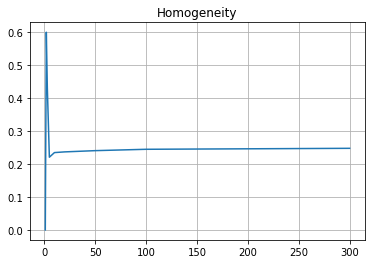

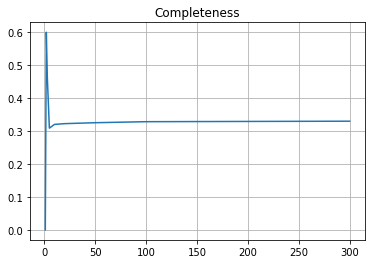

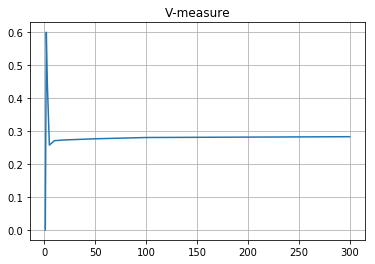

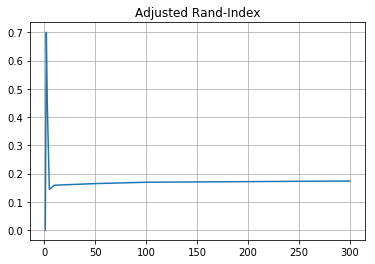

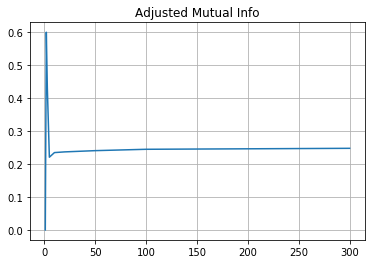

In [15]:
def calculate_SVD_score(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 100, 300] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating SVD for dimension, r =  ", n
        x_svd = TruncatedSVD(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=2, n_init = 30).fit(x_svd)
        
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_SVD_score(tfidf_dataset, labels)

### (a - ii) NMF

Calculating NMF for dimension, r =   1
Confusion Matrix is  [[1703 2200]
 [1656 2323]]
Calculating NMF for dimension, r =   2
Confusion Matrix is  [[ 309 3594]
 [3821  158]]
Calculating NMF for dimension, r =   3
Confusion Matrix is  [[3899    4]
 [2396 1583]]
Calculating NMF for dimension, r =   5
Confusion Matrix is  [[3898    5]
 [2677 1302]]
Calculating NMF for dimension, r =   10
Confusion Matrix is  [[3899    4]
 [2618 1361]]
Calculating NMF for dimension, r =   20
Confusion Matrix is  [[  22 3881]
 [1397 2582]]
Calculating NMF for dimension, r =   50
Confusion Matrix is  [[3893   10]
 [3979    0]]
Calculating NMF for dimension, r =   100
Confusion Matrix is  [[3893   10]
 [3979    0]]
Calculating NMF for dimension, r =   300
Confusion Matrix is  [[3628  275]
 [3976    3]]


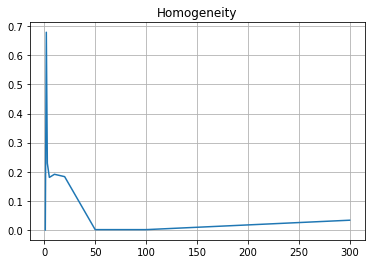

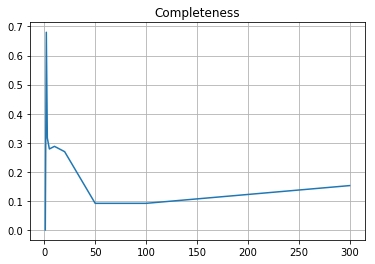

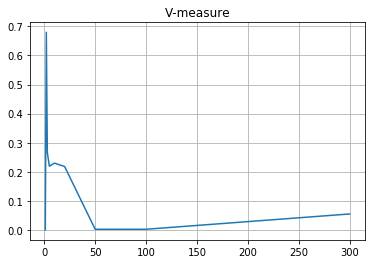

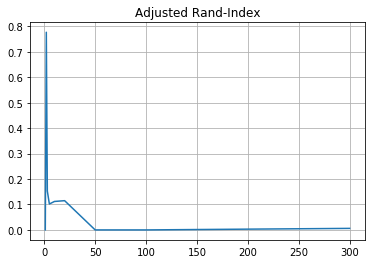

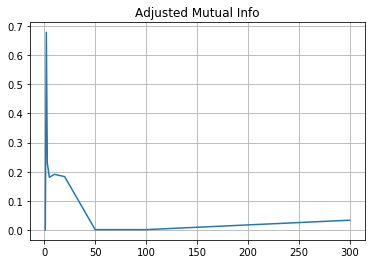

In [46]:
def calculate_NMF_score(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 100, 300] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating NMF for dimension, r =  ", n
        x_nmf = NMF(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf)
        
        # For some reason, x, y position of matrix is switched in the solution
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_NMF_score(tfidf_dataset, labels)

## Part 4
### (a) SVD

In [51]:
# We picked the best to be 2
r = 2
x_svd = TruncatedSVD(n_components = r).fit_transform(tfidf_dataset) # n_components is desired dimensionality of output data
km_svd = KMeans(n_clusters=2, n_init = 30).fit(x_svd)

Text(0.5,1,u'K-mean (predicted) Clustering')

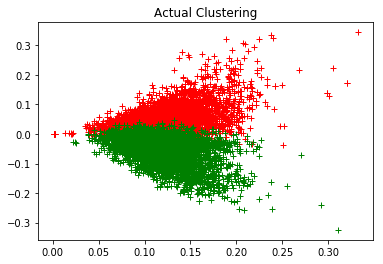

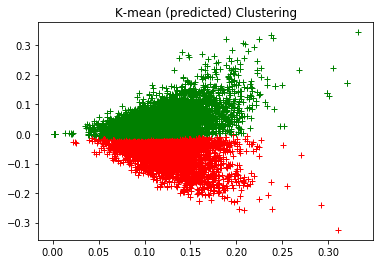

In [63]:
# Visualizition SVD (Actual)
x1 = x_svd[labels == 0][:,0]
y1 = x_svd[labels == 0][:,1]

x2 = x_svd[labels == 1][:,0]
y2 = x_svd[labels == 1][:,1]

plt.figure(1)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('Actual Clustering')

# Visualizition SVD K-clustering (Predicted)
x1 = x_svd[km_svd.labels_ == 0][:,0]
y1 = x_svd[km_svd.labels_ == 0][:,1]

x2 = x_svd[km_svd.labels_ == 1][:,0]
y2 = x_svd[km_svd.labels_ == 1][:,1]

plt.figure(2)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('K-mean (predicted) Clustering')


In [101]:
print "Confusion Matrix is ", metrics.confusion_matrix(labels, km_svd.labels_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km_svd.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km_svd.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km_svd.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km_svd.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km_svd.labels_))


Confusion Matrix is  [[ 186 3717]
 [3474  505]]
Homogeneity: 0.582
Completeness: 0.585
V-measure: 0.583
Adjusted Rand-Index: 0.680
Adjusted Mutual info score: 0.582


### (a) NMF

In [67]:
# We picked the best to be 2
r = 2
x_nmf = NMF(n_components = r).fit_transform(tfidf_dataset) # n_components is desired dimensionality of output data
km_nmf = KMeans(n_clusters=2, n_init = 30).fit(x_nmf)

Text(0.5,1,u'K-mean (predicted) Clustering')

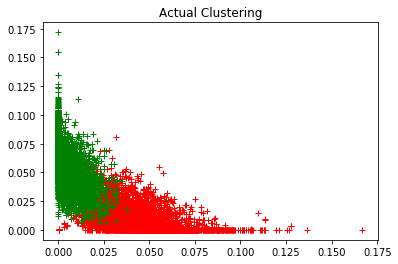

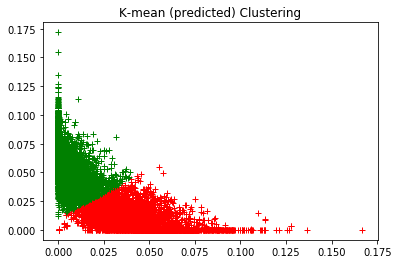

In [68]:
# Visualizition NMF (Actual)
x1 = x_nmf[labels == 0][:,0]
y1 = x_nmf[labels == 0][:,1]

x2 = x_nmf[labels == 1][:,0]
y2 = x_nmf[labels == 1][:,1]

plt.figure(1)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('Actual Clustering')

# Visualizition NMF K-clustering (Predicted)
x1 = x_nmf[km_nmf.labels_ == 0][:,0]
y1 = x_nmf[km_nmf.labels_ == 0][:,1]

x2 = x_nmf[km_nmf.labels_ == 1][:,0]
y2 = x_nmf[km_nmf.labels_ == 1][:,1]

plt.figure(2)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('K-mean (predicted) Clustering')

In [84]:
print "Confusion Matrix is ", metrics.confusion_matrix(labels, km_nmf.labels_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km_nmf.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km_nmf.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km_nmf.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km_nmf.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km_nmf.labels_))


Confusion Matrix is  [[3594  309]
 [ 158 3821]]
Homogeneity: 0.679
Completeness: 0.680
V-measure: 0.680
Adjusted Rand-Index: 0.777
Adjusted Mutual info score: 0.679


### (b) Normalizing Features (SVD)

Confusion Matrix is  [[ 186 3717]
 [3474  505]]
Homogeneity: 0.582
Completeness: 0.585
V-measure: 0.583
Adjusted Rand-Index: 0.680
Adjusted Mutual info score: 0.582


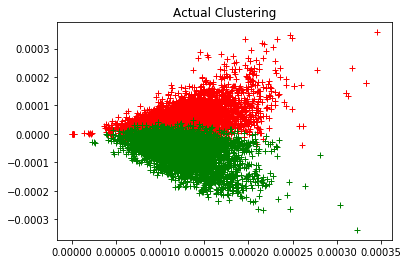

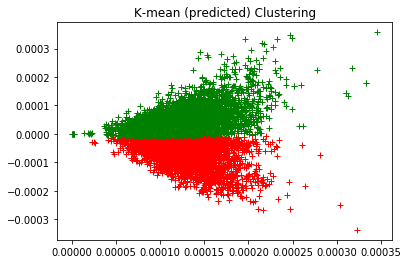

In [100]:
def calculate_normalized_score(svd, labels):
    x_svd_norm = svd/np.sum(svd)
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_svd_norm)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_svd_norm[labels == 0][:,0]
    y1 = x_svd_norm[labels == 0][:,1]

    x2 = x_svd_norm[labels == 1][:,0]
    y2 = x_svd_norm[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_svd_norm[km.labels_ == 0][:,0]
    y1 = x_svd_norm[km.labels_ == 0][:,1]

    x2 = x_svd_norm[km.labels_ == 1][:,0]
    y2 = x_svd_norm[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_svd, labels)

### (b) Normalizing Features (NMF)

Confusion Matrix is  [[3593  310]
 [ 158 3821]]
Homogeneity: 0.679
Completeness: 0.680
V-measure: 0.679
Adjusted Rand-Index: 0.777
Adjusted Mutual info score: 0.679


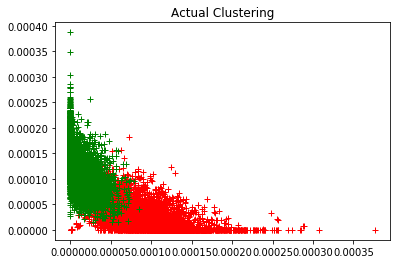

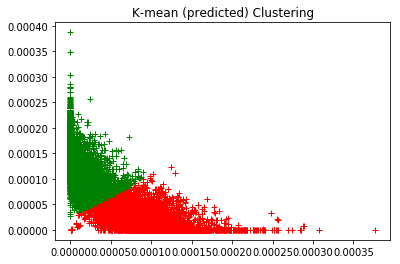

In [98]:
def calculate_normalized_score(nmf, labels):
    x_nmf_log = nmf/np.sum(nmf)
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_nmf, labels)

### (b) Non-Linear Transformation

Confusion Matrix is  [[ 397 3506]
 [3880   99]]
Homogeneity: 0.675
Completeness: 0.679
V-measure: 0.677
Adjusted Rand-Index: 0.764
Adjusted Mutual info score: 0.675


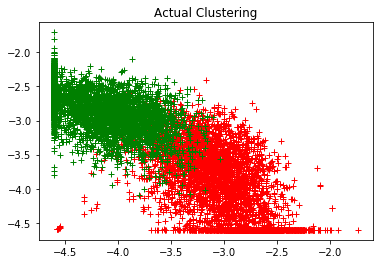

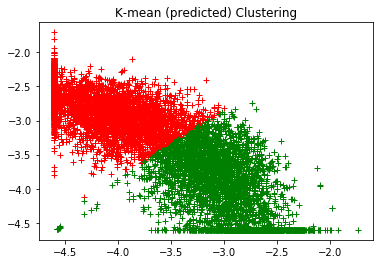

In [96]:
def calculate_nonlinear_score(nmf, labels):
    x_nmf_log = np.log(nmf+0.01) # add constant so 
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_nonlinear_score(x_nmf, labels)

### (b) Normalize then Log

Confusion Matrix is  [[ 328 3575]
 [3830  149]]
Homogeneity: 0.675
Completeness: 0.677
V-measure: 0.676
Adjusted Rand-Index: 0.773
Adjusted Mutual info score: 0.675


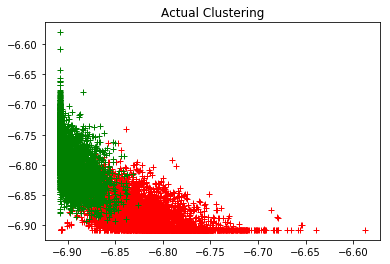

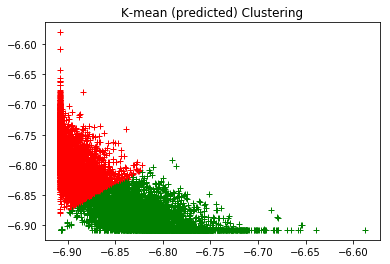

In [108]:
def calculate_normalized_score(nmf, labels):
    x_nmf_norm = nmf/np.sum(nmf)
    x_nmf_log = np.log(x_nmf_norm+0.001) # add constant so 
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_nmf, labels)

### (b) log then normalize

Confusion Matrix is  [[3681  222]
 [ 176 3803]]
Homogeneity: 0.712
Completeness: 0.712
V-measure: 0.712
Adjusted Rand-Index: 0.808
Adjusted Mutual info score: 0.712


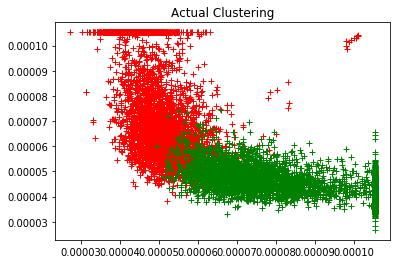

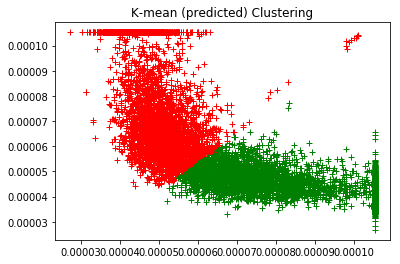

In [109]:
def calculate_normalized_score(nmf, labels):
    x_nmf_log = np.log(nmf+0.001) # add constant so 
    x_nmf_log = x_nmf_log/np.sum(x_nmf_log)
    
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_nmf, labels)